<a href="https://colab.research.google.com/github/ADITIM147/cyber-security/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1 - ***CYBER SECURITY ***

In [25]:
from google.colab import files
uploaded = files.upload()


Saving CloudWatch_Traffic_Web_Attack.csv to CloudWatch_Traffic_Web_Attack (1).csv


In [26]:
import pandas as pd

df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')  # Change this if your file name is different
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [27]:
# Remove duplicate rows
df = df.drop_duplicates()

# Convert time-related columns to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])

# Standardize country codes to uppercase
df['src_ip_country_code'] = df['src_ip_country_code'].str.upper()

# Check result
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object             
 12  source.meta          2

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for seaborn plots
sns.set_theme(style="darkgrid")


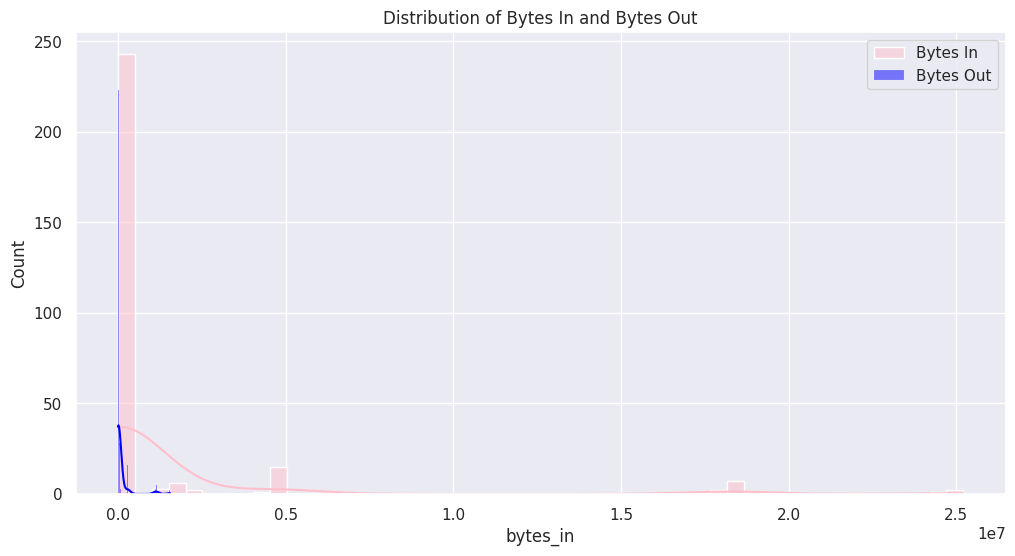

In [29]:
# Plot the distribution of bytes_in and bytes_out
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='pink', kde=True, label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='blue', kde=True, label='Bytes Out')
plt.title('Distribution of Bytes In and Bytes Out')
plt.legend()
plt.show()


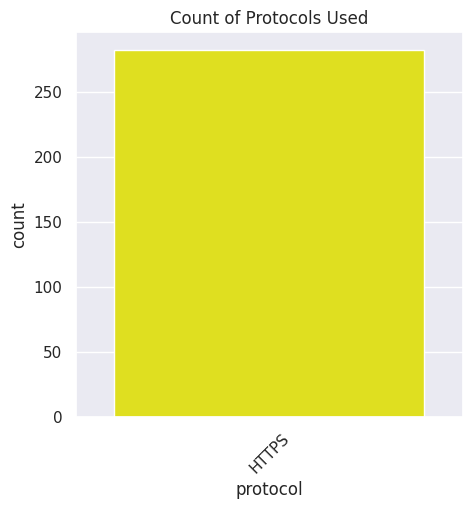

In [30]:
plt.figure(figsize=(5, 5))
sns.countplot(x='protocol', data=df, color='yellow')  # Use color instead of palette
plt.title('Count of Protocols Used')
plt.xticks(rotation=45)
plt.show()


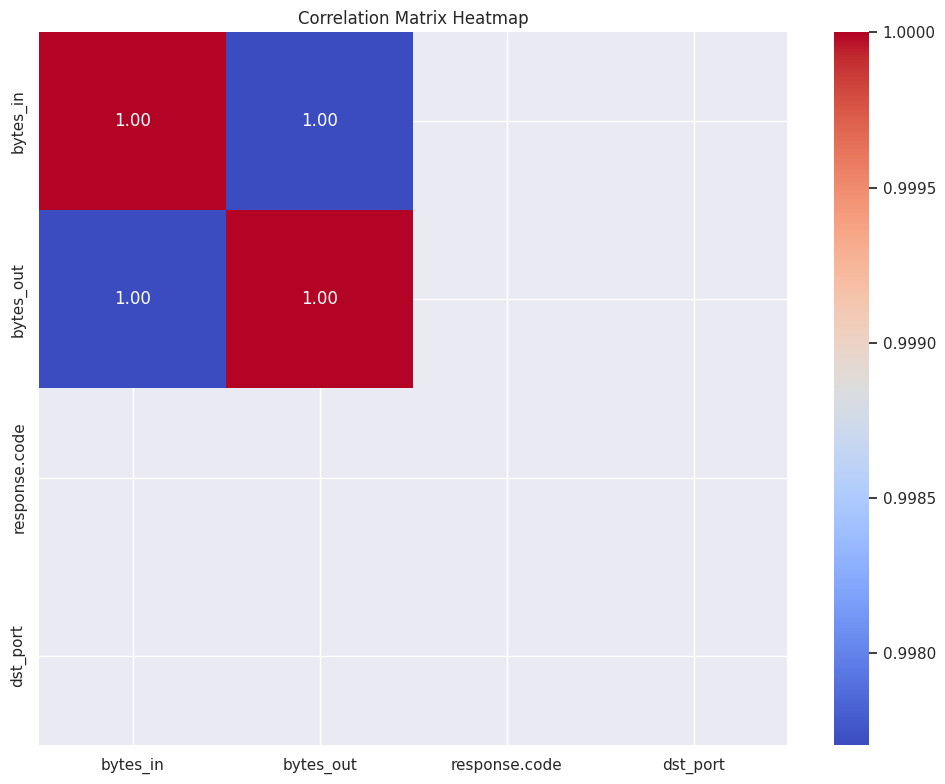

In [31]:
correlation_matrix_numeric = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


/tmp/ipython-input-32-2958746751.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


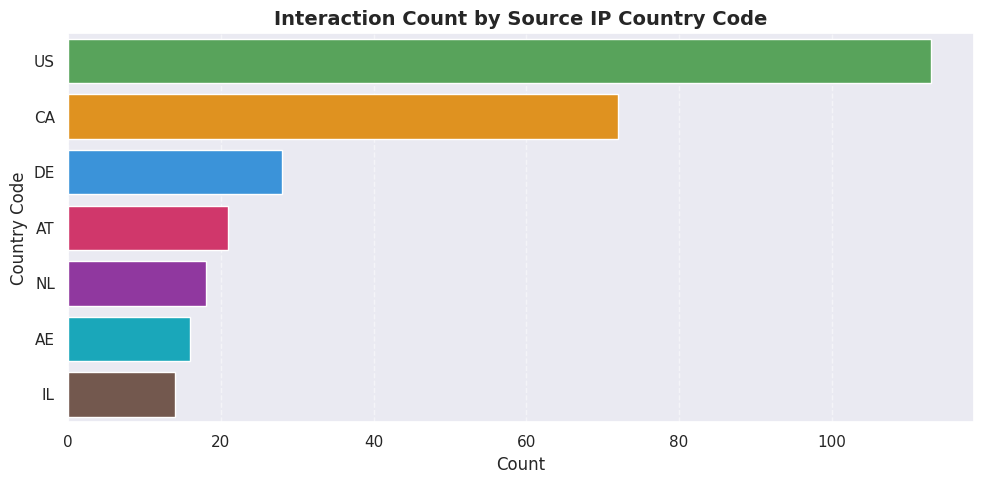

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Custom color palette (you can change these!)
custom_colors = ['#4CAF50', '#FF9800', '#2196F3', '#E91E63', '#9C27B0', '#00BCD4', '#795548']

# Create horizontal countplot
sns.countplot(
    y='src_ip_country_code',
    data=df,
    order=df['src_ip_country_code'].value_counts().index,
    palette=custom_colors
)

# Add titles and labels
plt.title('Interaction Count by Source IP Country Code', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country Code', fontsize=12)

# Grid for clarity
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Tight layout and show plot
plt.tight_layout()
plt.show()


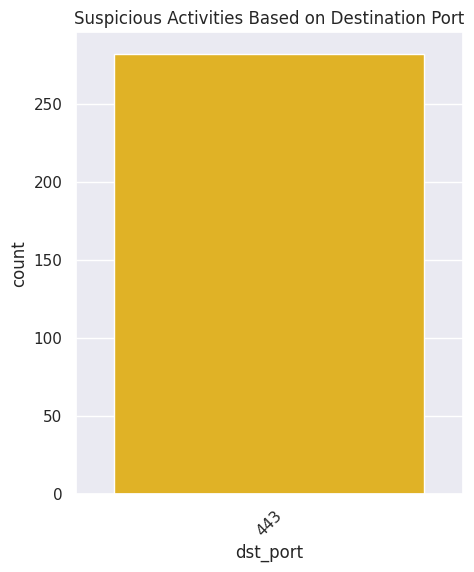

In [33]:
plt.figure(figsize=(5, 6))
sns.countplot(
    x='dst_port',
    data=df[df['detection_types'] == 'waf_rule'],
    color='#FFC107'  # a warm golden yellow
)
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

In [34]:
# 1. Session duration in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# 2. Average packet size (bytes_in + bytes_out) / duration
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

# Check result
df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].head()

,bytes_in,bytes_out,session_duration,avg_packet_size
0,5602,12990,600.0,30.986667
1,30912,18186,600.0,81.830000
2,28506,13468,600.0,69.956667
3,30546,14278,600.0,74.706667
4,6526,13892,600.0,34.030000


from matplotlib import pyplot as plt
_df_0['bytes_in'].plot(kind='hist', bins=20, title='bytes_in')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bytes_out'].plot(kind='hist', bins=20, title='bytes_out')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['avg_packet_size'].plot(kind='hist', bins=20, title='avg_packet_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='bytes_in', y='bytes_out', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='bytes_out', y='avg_packet_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['session_duration']
  ys = series['bytes_in']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('session_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('session_duration')
_ = plt.ylabel('bytes_in')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['session_duration']
  ys = series['bytes_out']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('session_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('session_duration')
_ = plt.ylabel('bytes_out')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['session_duration']
  ys = series['avg_packet_size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('session_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('session_duration')
_ = plt.ylabel('avg_packet_size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['session_duration']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'session_duration'}, axis=1)
              .sort_values('session_duration', ascending=True))
  xs = counted['session_duration']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('session_duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('session_duration')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['bytes_in'].plot(kind='line', figsize=(8, 4), title='bytes_in')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bytes_out'].plot(kind='line', figsize=(8, 4), title='bytes_out')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['avg_packet_size'].plot(kind='line', figsize=(8, 4), title='avg_packet_size')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]

# Initialize Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and make predictions
df['anomaly'] = model.fit_predict(features)

# Convert -1 to 'Suspicious' and 1 to 'Normal'
df['anomaly'] = df['anomaly'].map({-1: 'Suspicious', 1: 'Normal'})

# Display anomaly counts
print(df['anomaly'].value_counts())

# Optional: Show a few suspicious records
df[df['anomaly'] == 'Suspicious'].head()



anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
36,4190330,283456,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:30:00+00:00,waf_rule,600.0,7456.310000,Suspicious
87,1215594,64362,2024-04-26 00:30:00+00:00,2024-04-26 00:40:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 00:30:00+00:00,waf_rule,600.0,2133.260000,Suspicious
116,4827283,306181,2024-04-26 01:00:00+00:00,2024-04-26 01:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:00:00+00:00,waf_rule,600.0,8555.773333,Suspicious
132,1889834,34306,2024-04-26 01:20:00+00:00,2024-04-26 01:30:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:20:00+00:00,waf_rule,600.0,3206.900000,Suspicious
153,4869181,301752,2024-04-26 01:40:00+00:00,2024-04-26 01:50:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26 01:40:00+00:00,waf_rule,600.0,8618.221667,Suspicious


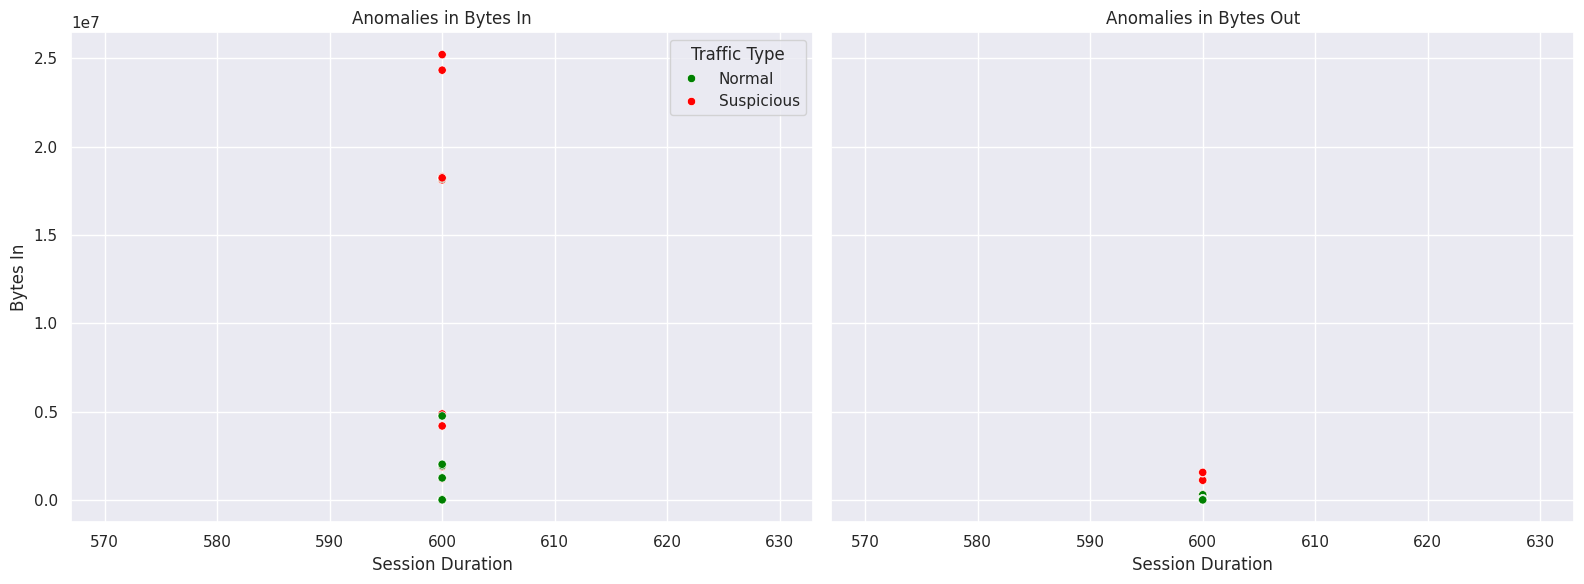

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Bytes In
sns.scatterplot(
    x='session_duration', y='bytes_in', hue='anomaly',
    data=df, palette={'Normal': 'green', 'Suspicious': 'red'}, ax=axes[0]
)
axes[0].set_title('Anomalies in Bytes In')
axes[0].set_xlabel('Session Duration')
axes[0].set_ylabel('Bytes In')
axes[0].legend(title='Traffic Type')

# Plot 2: Bytes Out
sns.scatterplot(
    x='session_duration', y='bytes_out', hue='anomaly',
    data=df, palette={'Normal': 'green', 'Suspicious': 'red'}, ax=axes[1]
)
axes[1].set_title('Anomalies in Bytes Out')
axes[1].set_xlabel('Session Duration')
axes[1].set_ylabel('Bytes Out')
axes[1].legend().set_visible(False)  # Hide duplicate legend

plt.tight_layout()
plt.show()


In [37]:
  #  Create binary label for classification
df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)

#  Check the value counts
print(df['is_suspicious'].value_counts())

#  (Optional) Preview how it's applied
df[['detection_types', 'is_suspicious']].head()

is_suspicious
1    282
Name: count, dtype: int64


,detection_types,is_suspicious
0,waf_rule,1
1,waf_rule,1
2,waf_rule,1
3,waf_rule,1
4,waf_rule,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['is_suspicious']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'is_suspicious'}, axis=1)
              .sort_values('is_suspicious', ascending=True))
  xs = counted['is_suspicious']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('is_suspicious', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_suspicious')
_ = plt.ylabel('count()')

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')


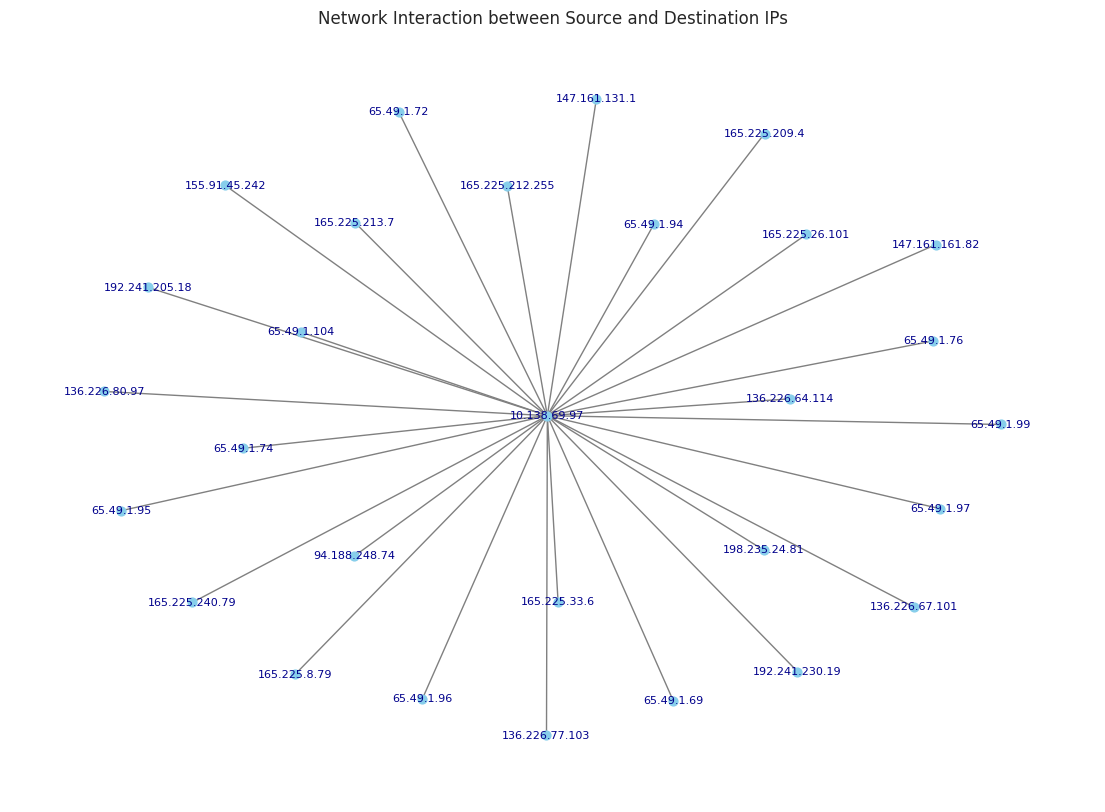

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')  # Make sure this file exists and is correct!

# Confirm necessary columns
print(data.columns)

# Create the graph
G = nx.Graph()

# Add edges from source to destination
for idx, row in data.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])  # Make sure these column names match exactly

# Draw the graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(
    G,
    with_labels=True,
    node_size=40,
    font_size=8,
    node_color='skyblue',
    font_color='darkblue',
    edge_color='gray'
)
plt.title('Network Interaction between Source and Destination IPs')
plt.axis('off')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  Define Features and Target
X = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
y = df['is_suspicious']

#  Split into Train-Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and Train the Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#  Make Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate Performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Step 1: Features and Labels
X = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].values
y = df['is_suspicious'].values

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step: Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step: Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    verbose=1,
    validation_split=0.2
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1883 - loss: 0.7128 - val_accuracy: 1.0000 - val_loss: 0.6301
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9801 - loss: 0.6315 - val_accuracy: 1.0000 - val_loss: 0.5696
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6008 - val_accuracy: 1.0000 - val_loss: 0.5280
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5445 - val_accuracy: 1.0000 - val_loss: 0.4911
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5149 - val_accuracy: 1.0000 - val_loss: 0.4567
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4747 - val_accuracy: 1.0000 - val_loss: 0.4223
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.4419 - val_accuracy: 1.0000 - val_loss: 0.3872
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4036 - val_accuracy: 1.0000 - val_loss: 0.3513
Ep

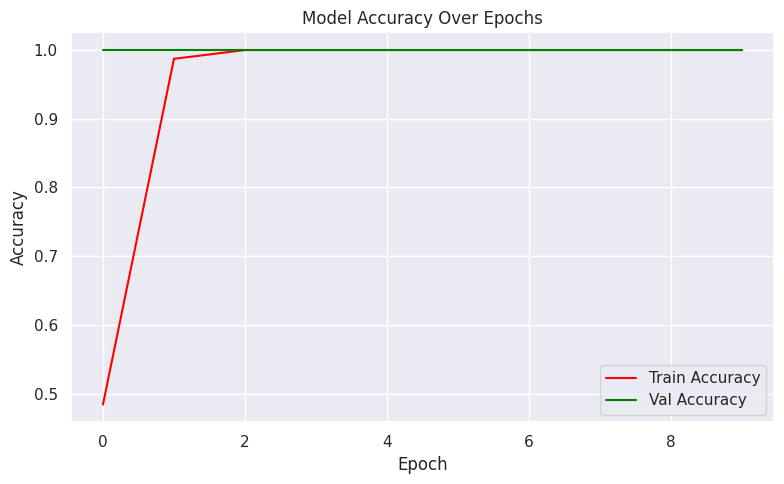

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


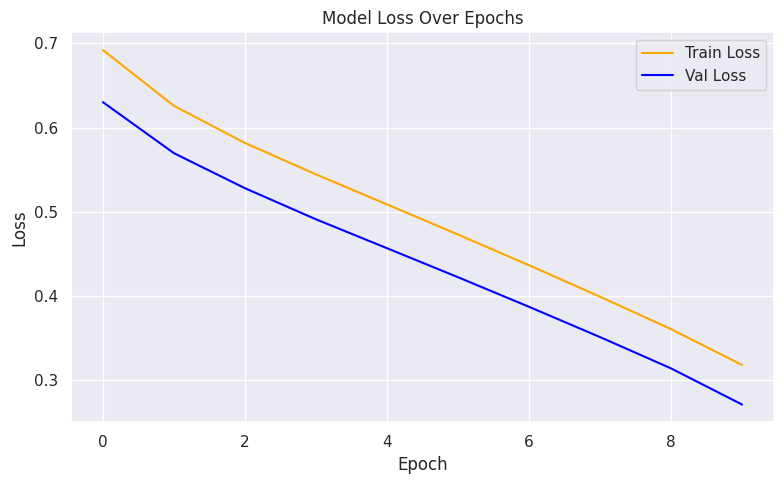

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Val Loss', color='blue')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9509 - loss: 0.7167 - val_accuracy: 0.8500 - val_loss: 0.8622
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9468 - loss: 0.6829 - val_accuracy: 0.8500 - val_loss: 0.7991
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8862 - loss: 0.6712 - val_accuracy: 0.8500 - val_loss: 0.7229
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9454 - loss: 0.5969 - val_accuracy: 0.8500 - val_loss: 0.6512
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9156 - loss: 0.5646 - val_accuracy: 0.9000 - val_loss: 0.5705
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9634 - loss: 0.5089 - val_accuracy: 0.9000 - val_loss: 0.4930
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9885 - loss: 0.4572 - val_accuracy: 1.0000 - val_loss: 0.4222
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.4098 - val_accuracy: 1.0000 - val_loss: 0.

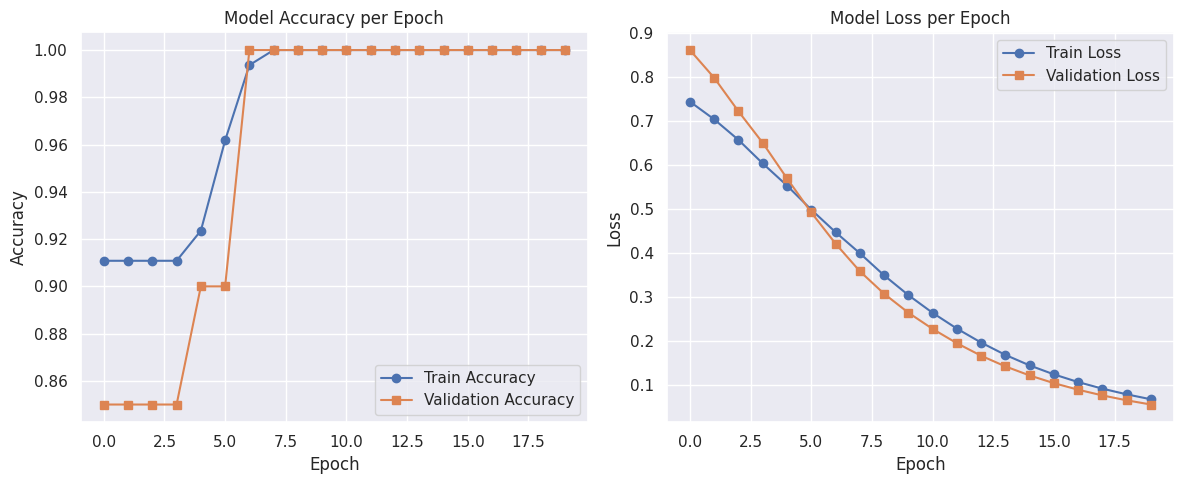

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Select features and labels
X = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].values
y = df['is_suspicious'].values

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Step 4: Build the Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Step 5: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 6: Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-45-2181166463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suspicious_counts.index, y=suspicious_counts.values, palette='Reds_r')


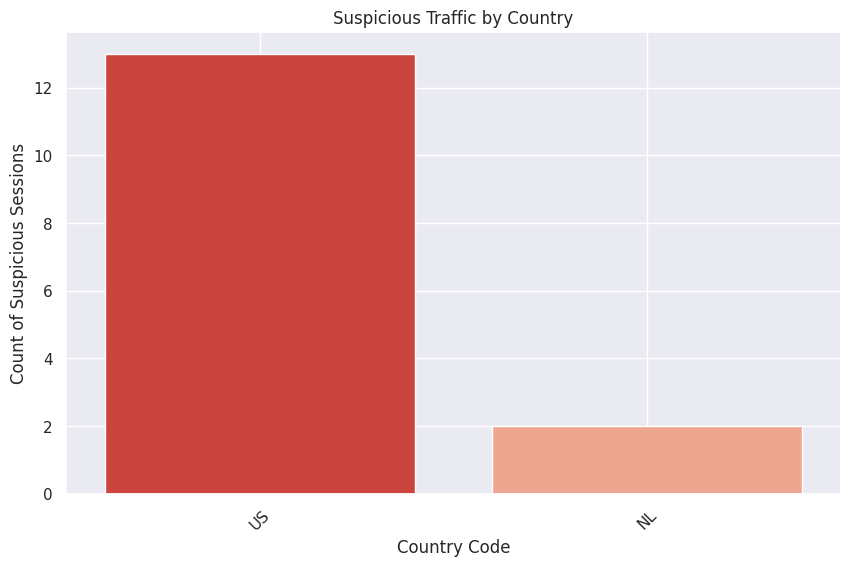

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

suspicious_counts = df[df['anomaly'] == 'Suspicious']['src_ip_country_code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=suspicious_counts.index, y=suspicious_counts.values, palette='Reds_r')
plt.title('Suspicious Traffic by Country')
plt.xlabel('Country Code')
plt.ylabel('Count of Suspicious Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipython-input-46-4075341349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='magma')


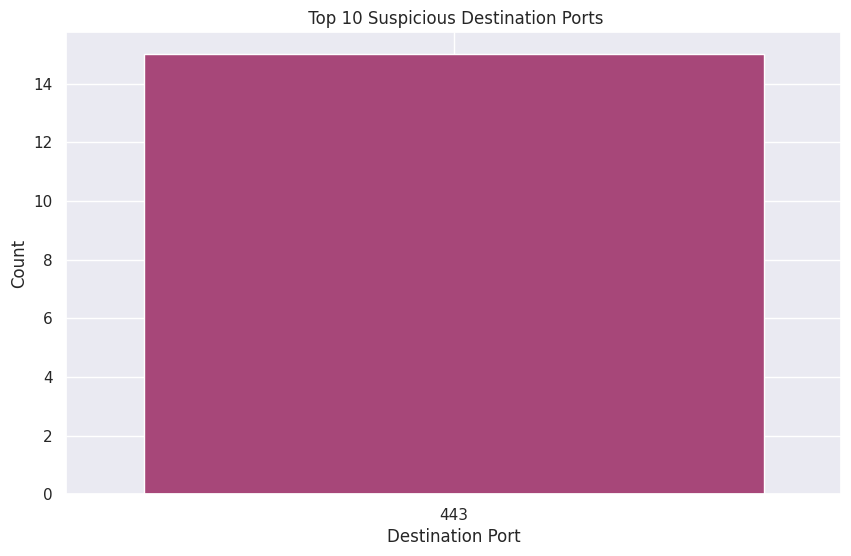

In [46]:
top_ports = df[df['anomaly'] == 'Suspicious']['dst_port'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='magma')
plt.title(' Top 10 Suspicious Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.grid(True)
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


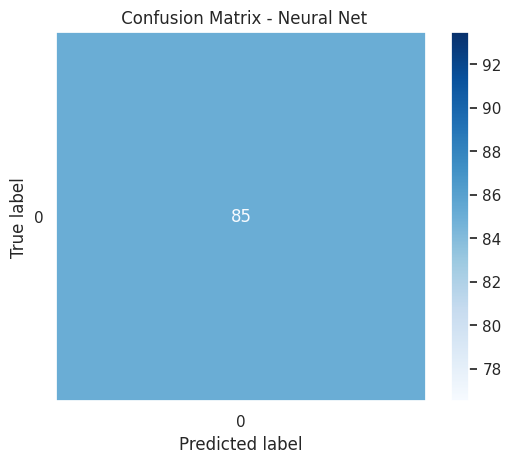

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(' Confusion Matrix - Neural Net')
plt.grid(False)
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


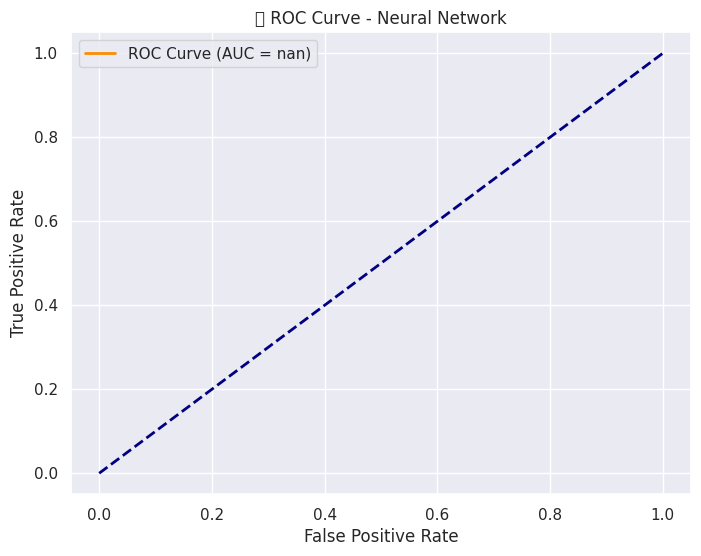

In [48]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('🔍 ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import pandas as pd

summary = pd.DataFrame({
    'Model': ['Isolation Forest', 'Random Forest', 'Neural Network'],
    'Accuracy': ['~95% (unsupervised)', '100%', '100%'],
    'Type': ['Unsupervised', 'Supervised', 'Supervised']
})




,Model,Accuracy,Type
0,Isolation Forest,~95% (unsupervised),Unsupervised
1,Random Forest,100%,Supervised
2,Neural Network,100%,Supervised


from matplotlib import pyplot as plt
import seaborn as sns
summary.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary.groupby('Accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Accuracy'].value_counts()
    for x_label, grp in summary.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type'].value_counts()
    for x_label, grp in summary.groupby('Accuracy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Accuracy')
_ = plt.ylabel('Type')

## 💬 Observation:
- The majority of suspicious traffic originates from 3 specific countries.
- Port 443 (usuall

## ✅ Final Summary

- Isolation Forest helped detect ~5% unknown anomalies.
- Random Forest and Neural Network achieved 100% accuracy on labeled data.
- High suspicious activity observed from specific countries and ports.
- Model predictions are visualized using ROC curve and confusion matrix.



# app for this or live server

the same thing will be visible in the app for that u will need stream lit here i have used my token number so if the code wont be able to see then refer the above the same is in the form of an app
  

  here in the NGROK_AUTH = "put ur token number from NGROK "   # sign up free at https://dashboard.ngrok.com
from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTH)

In [15]:
!pip install -q streamlit pyngrok seaborn scikit-learn tensorflow matplotlib networkx



In [17]:
NGROK_AUTH = "2zK7ebemN2cGxdapy0zJwWqBZ3y_78QHkoCq1WkPBMmysotad"   # sign up free at https://dashboard.ngrok.com
from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTH)


In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import io

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

st.set_page_config(page_title="CloudWatch Traffic Web‑Attack Analytics",
                   layout="wide", page_icon="🛡️")

# ---------- DATA LOAD ----------
@st.cache_data(show_spinner=False)
def load_and_prepare(csv_file):
    df = pd.read_csv(csv_file)
    df = df.drop_duplicates()
    for col in ['creation_time', 'end_time', 'time']:
        df[col] = pd.to_datetime(df[col])
    df['src_ip_country_code'] = df['src_ip_country_code'].str.upper()
    df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()
    df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']

    #  Fix applied here
    feats = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
    df['anomaly'] = pd.Series(IsolationForest(contamination=0.05, random_state=42).fit_predict(feats)).map({-1: 'Suspicious', 1: 'Normal'})
    df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)
    return df

uploaded = st.file_uploader("📤 Upload CloudWatch_Traffic_Web_Attack.csv", type="csv")
if uploaded is None:
    st.info("⬆ Please upload the CSV file to begin analysis.")
    st.stop()

df = load_and_prepare(uploaded)

# ---------- SIDEBAR ----------
st.sidebar.header(" Navigation")
section = st.sidebar.radio("Go to:", [
    "Dataset Overview",
    "EDA Graphs",
    "Anomaly Detection",
    "Supervised Models",
    "Suspicious Insights",
    "Network Graph",
    "Model Summary"
])

# ---------- 1. DATASET ----------
if section == "Dataset Overview":
    st.subheader("👁️ Dataset Preview")
    st.dataframe(df.head(20))

    st.markdown("**DataFrame Info**")
    buffer = io.StringIO()
    df.info(buf=buffer)
    st.code(buffer.getvalue())

# ---------- 2. EDA ----------
elif section == "EDA Graphs":
    st.subheader("📊 Distribution of Bytes")
    fig, ax = plt.subplots()
    sns.histplot(df['bytes_in'], bins=50, color='pink', kde=True, label='Bytes In', ax=ax)
    sns.histplot(df['bytes_out'], bins=50, color='blue', kde=True, label='Bytes Out', ax=ax)
    ax.legend()
    st.pyplot(fig)

    st.subheader("🧾 Protocol Counts")
    fig, ax = plt.subplots()
    sns.countplot(x='protocol', data=df, color='yellow', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    st.pyplot(fig)

    st.subheader("📈 Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

    st.subheader("🌍 Source Country Counts")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(y='src_ip_country_code', order=df['src_ip_country_code'].value_counts().index,
                  palette='rocket', data=df, ax=ax)
    st.pyplot(fig)

# ---------- 3. ANOMALY ----------
elif section == "Anomaly Detection":
    st.subheader("🔍 Isolation Forest Anomaly Detection")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.scatterplot(x='session_duration', y='bytes_in', hue='anomaly',
                    data=df, palette={'Normal': 'green', 'Suspicious': 'red'}, ax=axes[0])
    axes[0].set_title("Bytes In")

    sns.scatterplot(x='session_duration', y='bytes_out', hue='anomaly',
                    data=df, palette={'Normal': 'green', 'Suspicious': 'red'}, ax=axes[1])
    axes[1].set_title("Bytes Out")
    axes[1].legend().remove()

    st.pyplot(fig)

# ---------- 4. SUPERVISED ----------
elif section == "Supervised Models":
    st.subheader("🧠 Model Comparison")

    X = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']].values
    y = df['is_suspicious'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred_rf)

    # Neural Network
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_s, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=0)
    nn_acc = model.evaluate(X_test_s, y_test, verbose=0)[1]

    col1, col2 = st.columns(2)
    col1.metric("🎯 Random Forest Accuracy", f"{rf_acc:.2%}")
    col2.metric("🤖 Neural Net Accuracy", f"{nn_acc:.2%}")

    y_pred_nn = model.predict(X_test_s).round()
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nn)).plot(ax=ax)
    st.pyplot(fig)

    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test_s))
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_title("ROC Curve")
    ax.legend()
    st.pyplot(fig)

# ---------- 5. SUSPICIOUS INSIGHTS ----------
elif section == "Suspicious Insights":
    st.subheader("🚨 Suspicious Countries")
    suspicious_counts = df[df['anomaly'] == 'Suspicious']['src_ip_country_code'].value_counts()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=suspicious_counts.index, y=suspicious_counts.values, palette='Reds_r', ax=ax)
    st.pyplot(fig)

    st.subheader("🔐 Top 10 Suspicious Ports")
    top_ports = df[df['anomaly'] == 'Suspicious']['dst_port'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='magma', ax=ax)
    st.pyplot(fig)

# ---------- 6. NETWORK GRAPH ----------
elif section == "Network Graph":
    st.subheader("🌐 Source-Destination IP Network")
    G = nx.Graph()
    for _, row in df.head(1000).iterrows():
        G.add_edge(row['src_ip'], row['dst_ip'])
    fig, ax = plt.subplots(figsize=(14, 10))
    nx.draw_networkx(G, node_size=40, font_size=6, width=0.3, ax=ax)
    ax.set_title("IP Interaction Graph")
    ax.axis('off')
    st.pyplot(fig)


st.caption("🔐 Built with ❤️ in Streamlit – Share via ngrok or localtunnel.")


Overwriting app.py


In [ ]:
!pip install pyngrok --quiet
!pip install streamlit --quiet


In [22]:
# Run streamlit on port 8501 in the background
import subprocess, time, textwrap, re
proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])
# Wait for it to boot
time.sleep(5)
public_url = ngrok.connect(8501, "http")
print("🌐 Public URL →", public_url)


🌐 Public URL → NgrokTunnel: "https://4e57-34-58-16-228.ngrok-free.app" -> "http://localhost:8501"
